In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
import bs4
import textblob
# roberta - wytrenowany model z hugging face
# vader - bag of words 

In [113]:
df_br = pd.read_csv("blade-runner-2049_reviews_fixed.csv")
df_d = pd.read_csv("drive-2011_reviews_fixed.csv")

In [114]:
print("przed usunięciem wierszy bez ocen:", df_br.shape[0], df_d.shape[0], df_br.shape[0] + df_d.shape[0])

przed usunięciem wierszy bez ocen: 9296 9558 18854


### Badanie czy wydźwięk recenzji zgadza się z opinią

In [116]:
df_br = df_br.dropna(subset=['Rating'])
df_d = df_d.dropna(subset=['Rating'])
df_br['Rating'] = df_br['Rating'].astype(int)
df_d['Rating'] = df_d['Rating'].astype(int)
df = pd.concat([df_br, df_d])
df.to_csv("all_reviews.csv", index=False)
print("po usunięciu", df_br.shape[0], df_d.shape[0], df.shape[0])

po usunięciu 9055 9402 18457


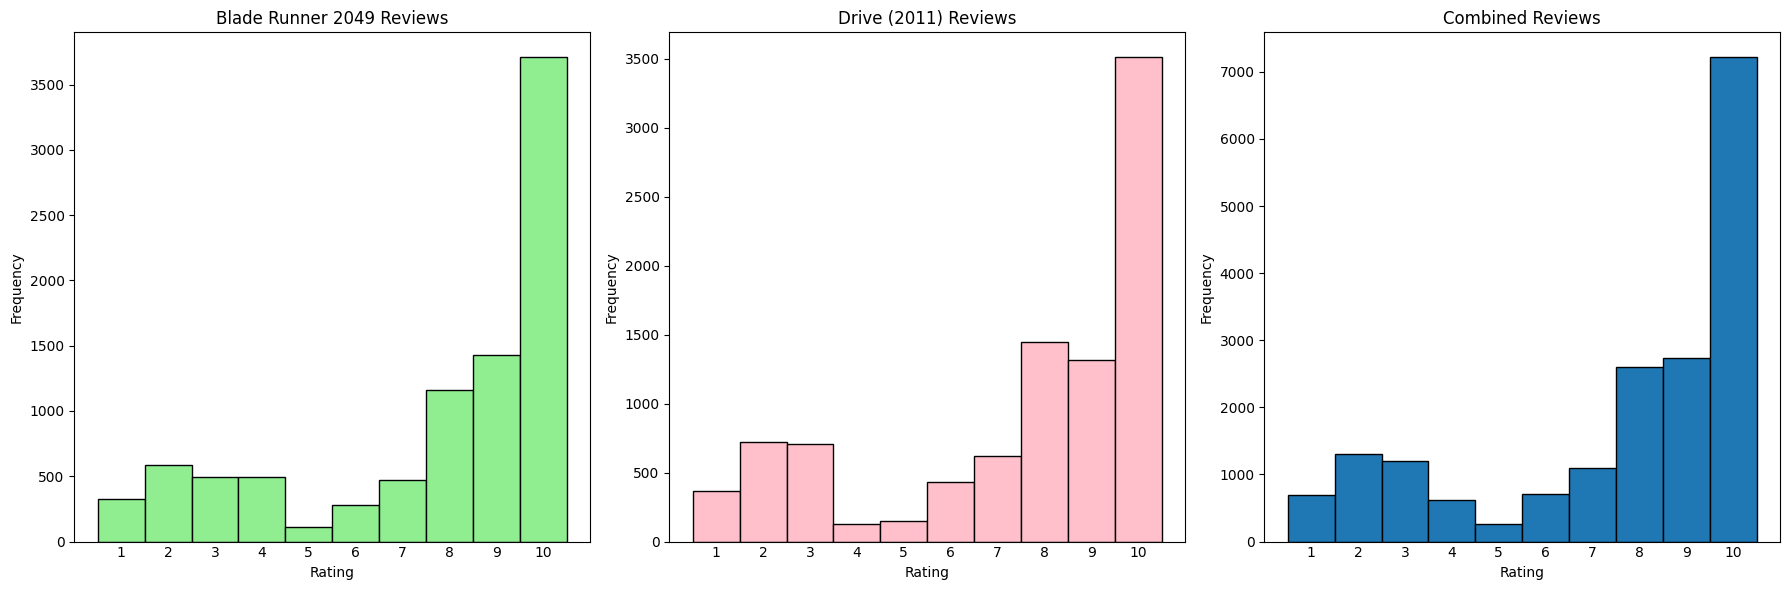

In [117]:
plt.figure(figsize=(18, 6))

x_ticks = list(range(1, 11))

plt.subplot(1, 3, 1)
plt.hist(df_br['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='lightgreen')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Blade Runner 2049 Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 2)
plt.hist(df_d['Rating'], bins=range(1, 12), edgecolor='black', align='left', color='pink')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Drive (2011) Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.subplot(1, 3, 3)
plt.hist(df['Rating'], bins=range(1, 12), edgecolor='black', align='left')
plt.xticks(x_ticks)
plt.gca().tick_params(axis='x', length=0)
plt.title('Combined Reviews')
plt.xlabel('Rating')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

In [118]:
from nltk.sentiment import SentimentIntensityAnalyzer
from tqdm.notebook import tqdm

In [128]:
df = pd.read_csv("all_reviews.csv")

In [129]:
df = df.reset_index().rename(columns={'index': 'Id'})

In [131]:
vader_a = SentimentIntensityAnalyzer()

In [132]:
res = {}
for i, row in tqdm(df.iterrows()):
    review = row['Review']
    rev_id = row['Id']
    res[rev_id] = vader_a.polarity_scores(review)

0it [00:00, ?it/s]

In [137]:
vaders = pd.DataFrame(res).T

In [138]:
vaders = vaders.reset_index().rename(columns={'index': 'Id'})
vaders = vaders.merge(df, how='left')

In [139]:
vaders

,Id,neg,neu,pos,compound,Date,Review,Rating
0,0,0.000,0.760,0.240,0.9118,2024-06-13,A well shot film with great acting that falls ...,8
1,1,0.000,1.000,0.000,0.0000,2024-06-13,THIS IS CINEMA!!! 👑🗣,10
2,2,0.000,1.000,0.000,0.0000,2024-06-13,why are the barcodes in the eye. WHY.,6
3,3,0.000,0.650,0.350,0.8658,2022-12-17,"It's a great film, definitely a worthy follow-...",9
4,4,0.000,0.530,0.470,0.7964,2024-06-13,it’s a good movie i love ryan gosling and ana ...,6
...,...,...,...,...,...,...,...,...
18452,18452,0.092,0.798,0.111,0.1226,2019-08-20,I really feel like the writers thought people ...,3
18453,18453,0.111,0.779,0.111,0.0000,2019-07-31,I thought a lot of the movie was unneeded and ...,3
18454,18454,0.221,0.779,0.000,-0.8176,2019-07-24,I predicted the ending 30 minutes in. The grue...,3
18455,18455,0.000,0.654,0.346,0.5719,2019-06-29,I really don't understand why everyone loves t...,3


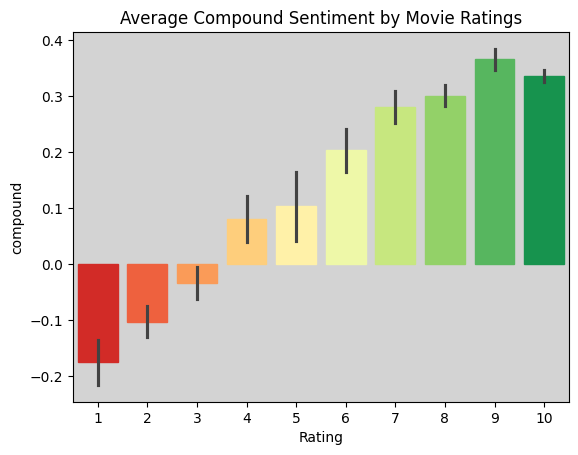

In [151]:
import seaborn as sns
import matplotlib.pyplot as plt

# Przygotowanie danych i wykresu
ax = sns.barplot(data=vaders, x='Rating', y='compound')

# Ustawienie tytułu wykresu
ax.set_title("Average Compound Sentiment by Movie Ratings")

# Generowanie palety kolorów (gradient od czerwonego do zielonego)
colors = sns.color_palette("RdYlGn", len(vaders['Rating'].unique()))

# Ustawienie kolorów słupków
for i, bar in enumerate(ax.patches):
    rating_index = i % len(vaders['Rating'].unique())
    bar.set_color(colors[rating_index])

# Wyświetlenie wykresu
ax.set_facecolor('lightgray')
plt.show()


In [165]:
sns.color_palette()

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354),
 (0.8901960784313725, 0.4666666666666667, 0.7607843137254902),
 (0.4980392156862745, 0.4980392156862745, 0.4980392156862745),
 (0.7372549019607844, 0.7411764705882353, 0.13333333333333333),
 (0.09019607843137255, 0.7450980392156863, 0.8117647058823529)]

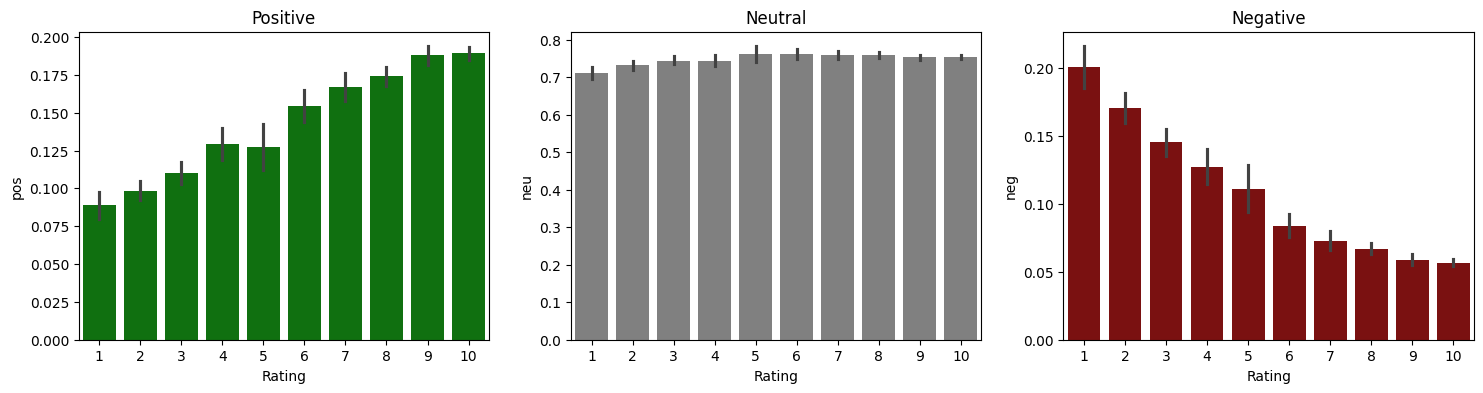

In [169]:
fig, axs = plt.subplots(1, 3, figsize=(18,4))
sns.barplot(data=vaders, x='Rating', y='pos', ax=axs[0], color='green')
axs[0].set_title('Positive')

sns.barplot(data=vaders, x='Rating', y='neu', ax=axs[1], color='gray')
axs[1].set_title('Neutral')

sns.barplot(data=vaders, x='Rating', y='neg', ax=axs[2], color='darkred')
axs[2].set_title('Negative')
plt.show()

## Roberta

In [170]:
from transformers import AutoTokenizer
from transformers import AutoModelForSequenceClassification
from scipy.special import softmax

In [171]:
MODEL = f"cardiffnlp/twitter-roberta-base-sentiment"
tokenizer = AutoTokenizer.from_pretrained(MODEL)
model = AutoModelForSequenceClassification.from_pretrained(MODEL)

/home/agata/.local/lib/python3.10/site-packages/huggingface_hub/file_download.py:1132: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [ ]:
# wish u could rate it higher. everything so fire 🔥🔥🔥🔥😭🔥😭😭🔥🔥🔥🔥🔥🔥